<a href="https://colab.research.google.com/github/wiiloebis/bangkit_machine_learning_assigment/blob/master/Self_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

In [312]:
df = pd.read_csv('sample_data/googleplaystore.csv')
#Drop these colums because it's not relevant to be used as feature for data training
#App is just an app name. It has no useful meaning for the training
#Last Updated indicates newest version release date, which means this app already available before
#Current Version indicates current version of the app available in playstore, which means this app already available before
df = df.drop(columns=['App', 'Last Updated', 'Current Ver'])
df = df.rename(columns={"Android Ver": "Android_Ver", "Content Rating": "Content_Rating"})

string_to_remove = ["$", "M"]
columns = ["Price", "Size"]

# print(df.iloc[36, :])

# loop over columns that we want to remove a substring from
for col in columns:
    # remove string from columns one by one
    for string in string_to_remove:
        df[col] = df[col].str.replace(string, '')
    # convert the column to numeric
    df[col] = pd.to_numeric(df[col], errors="coerce")

df.info()
df = df.dropna()

# print(df.Size.unique())
X = df.iloc[:, df.columns != 'Installs'].values
Y = df.iloc[:, 4].values
print(X.shape)
print(Y.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 10 columns):
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              8829 non-null float64
Installs          10841 non-null object
Type              10840 non-null object
Price             10840 non-null float64
Content_Rating    10840 non-null object
Genres            10841 non-null object
Android_Ver       10838 non-null object
dtypes: float64(3), object(7)
memory usage: 847.1+ KB
(7469, 9)
(7469,)


In [0]:
labelEncoder_Category =  LabelEncoder()
print(df.Category.unique())
X[:,0] = labelEncoder_Category.fit_transform(X[:,0])
print(X[:4,:])

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']
[[0 4.1 '159' 19.0 'Free' 0.0 'Everyone' 'Art & Design' '4.0.3 and up']
 [0 3.9 '967' 14.0 'Free' 0.0 'Everyone' 'Art & Design;Pretend Play'
  '4.0.3 and up']
 [0 4.7 '87510' 8.7 'Free' 0.0 'Everyone' 'Art & Design' '4.0.3 and up']
 [0 4.5 '215644' 25.0 'Free' 0.0 'Teen' 'Art & Design' '4.2 and up']]


In [0]:
labelEncoder_Genre =  LabelEncoder()
# print(df.Genres.unique())
print(X[:4,:])
X[:,7] = labelEncoder_Genre.fit_transform(X[:,7])
print(X[:4,:])

[[0 4.1 '159' 19.0 'Free' 0.0 'Everyone' 'Art & Design' '4.0.3 and up']
 [0 3.9 '967' 14.0 'Free' 0.0 'Everyone' 'Art & Design;Pretend Play'
  '4.0.3 and up']
 [0 4.7 '87510' 8.7 'Free' 0.0 'Everyone' 'Art & Design' '4.0.3 and up']
 [0 4.5 '215644' 25.0 'Free' 0.0 'Teen' 'Art & Design' '4.2 and up']]
[[0 4.1 '159' 19.0 'Free' 0.0 'Everyone' 9 '4.0.3 and up']
 [0 3.9 '967' 14.0 'Free' 0.0 'Everyone' 11 '4.0.3 and up']
 [0 4.7 '87510' 8.7 'Free' 0.0 'Everyone' 9 '4.0.3 and up']
 [0 4.5 '215644' 25.0 'Free' 0.0 'Teen' 9 '4.2 and up']]


In [0]:
# print(df.Type.unique())
labelEncoder_Type =  LabelEncoder()
print(X[:4,:])
X[:,4] = labelEncoder_Type.fit_transform(X[:,4])
print(X[:4,:])

[[0 4.1 '159' 19.0 'Free' 0.0 'Everyone' 9 '4.0.3 and up']
 [0 3.9 '967' 14.0 'Free' 0.0 'Everyone' 11 '4.0.3 and up']
 [0 4.7 '87510' 8.7 'Free' 0.0 'Everyone' 9 '4.0.3 and up']
 [0 4.5 '215644' 25.0 'Free' 0.0 'Teen' 9 '4.2 and up']]
[[0 4.1 '159' 19.0 0 0.0 'Everyone' 9 '4.0.3 and up']
 [0 3.9 '967' 14.0 0 0.0 'Everyone' 11 '4.0.3 and up']
 [0 4.7 '87510' 8.7 0 0.0 'Everyone' 9 '4.0.3 and up']
 [0 4.5 '215644' 25.0 0 0.0 'Teen' 9 '4.2 and up']]


In [0]:
# print(df.Android_Ver.unique())
labelEncoder_AndroidVersion =  LabelEncoder()
print(X[:4,:])
X[:,8] = labelEncoder_AndroidVersion.fit_transform(X[:,8])
print(X[:4,:])

['4.0.3 and up' '4.2 and up' '4.4 and up' '2.3 and up' '3.0 and up'
 '4.1 and up' '4.0 and up' '5.0 and up' '6.0 and up' '1.6 and up'
 '2.1 and up' '2.2 and up' '1.5 and up' '7.0 and up' '4.3 and up'
 '4.0.3 - 7.1.1' '2.3.3 and up' 'Varies with device' '3.2 and up'
 '2.0 and up' '4.4W and up' '5.1 and up' '7.0 - 7.1.1' '8.0 and up'
 '5.0 - 8.0' '3.1 and up' '7.1 and up' '2.0.1 and up' '4.1 - 7.1.1'
 '5.0 - 6.0' '1.0 and up']
[[0 4.1 '159' 19.0 0 0.0 'Everyone' 9 '4.0.3 and up']
 [0 3.9 '967' 14.0 0 0.0 'Everyone' 11 '4.0.3 and up']
 [0 4.7 '87510' 8.7 0 0.0 'Everyone' 9 '4.0.3 and up']
 [0 4.5 '215644' 25.0 0 0.0 'Teen' 9 '4.2 and up']]
[[0 4.1 '159' 19.0 0 0.0 'Everyone' 9 14]
 [0 3.9 '967' 14.0 0 0.0 'Everyone' 11 14]
 [0 4.7 '87510' 8.7 0 0.0 'Everyone' 9 14]
 [0 4.5 '215644' 25.0 0 0.0 'Teen' 9 17]]


In [0]:
print(df.Rating.unique())
X[:, [1]] = np.vstack(X[:, [1]]).astype(np.float)
print(X[:10, :])

[4.1 3.9 4.7 4.5 4.3 4.4 3.8 4.2 4.6 3.2 4.  4.8 4.9 3.6 3.7 3.3 3.4 3.5
 5.  2.6 3.1 3.  1.9 2.5 2.8 2.7 1.  2.9 2.3 2.2 1.7 2.  1.8 2.4 1.6 2.1
 1.4 1.5 1.2]
[[0 4.1 '159' 19.0 0 0.0 'Everyone' 9 14]
 [0 3.9 '967' 14.0 0 0.0 'Everyone' 11 14]
 [0 4.7 '87510' 8.7 0 0.0 'Everyone' 9 14]
 [0 4.5 '215644' 25.0 0 0.0 'Teen' 9 17]
 [0 4.3 '967' 2.8 0 0.0 'Everyone' 10 19]
 [0 4.4 '167' 5.6 0 0.0 'Everyone' 9 7]
 [0 3.8 '178' 19.0 0 0.0 'Everyone' 9 14]
 [0 4.1 '36815' 29.0 0 0.0 'Everyone' 9 17]
 [0 4.4 '13791' 33.0 0 0.0 'Everyone' 9 9]
 [0 4.7 '121' 3.1 0 0.0 'Everyone' 10 14]]


In [0]:
print(df.Content_Rating.unique())
labelEncoder_Content_Rating =  LabelEncoder()
print(X[:10, :])
X[:,6] = labelEncoder_Content_Rating.fit_transform(X[:,6])
print(X[:10, :])

['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']
[[0 4.1 '159' 19.0 0 0.0 'Everyone' 9 14]
 [0 3.9 '967' 14.0 0 0.0 'Everyone' 11 14]
 [0 4.7 '87510' 8.7 0 0.0 'Everyone' 9 14]
 [0 4.5 '215644' 25.0 0 0.0 'Teen' 9 17]
 [0 4.3 '967' 2.8 0 0.0 'Everyone' 10 19]
 [0 4.4 '167' 5.6 0 0.0 'Everyone' 9 7]
 [0 3.8 '178' 19.0 0 0.0 'Everyone' 9 14]
 [0 4.1 '36815' 29.0 0 0.0 'Everyone' 9 17]
 [0 4.4 '13791' 33.0 0 0.0 'Everyone' 9 9]
 [0 4.7 '121' 3.1 0 0.0 'Everyone' 10 14]]
[[0 4.1 '159' 19.0 0 0.0 1 9 14]
 [0 3.9 '967' 14.0 0 0.0 1 11 14]
 [0 4.7 '87510' 8.7 0 0.0 1 9 14]
 [0 4.5 '215644' 25.0 0 0.0 4 9 17]
 [0 4.3 '967' 2.8 0 0.0 1 10 19]
 [0 4.4 '167' 5.6 0 0.0 1 9 7]
 [0 3.8 '178' 19.0 0 0.0 1 9 14]
 [0 4.1 '36815' 29.0 0 0.0 1 9 17]
 [0 4.4 '13791' 33.0 0 0.0 1 9 9]
 [0 4.7 '121' 3.1 0 0.0 1 10 14]]


Load data from CSV

In [0]:
print(Y.shape)
print(X.shape)
# print(X[0,:])
dataframeX = pd.DataFrame(X)
dataframeY = pd.DataFrame(Y)
bestfeatures = SelectKBest(score_func=chi2, k=7)
fit = bestfeatures.fit(dataframeX,dataframeY)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(dataframeX.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 10 best features

(7469,)
(7469, 9)
   Specs         Score
2      2  4.370237e+10
3      3  2.222939e+04
5      5  1.128823e+04
7      7  1.216147e+03
4      4  5.203057e+02


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[0.07742966 0.13475523 0.36487568 0.16786575 0.00705072 0.00854216
 0.02669006 0.09386022 0.11893051]


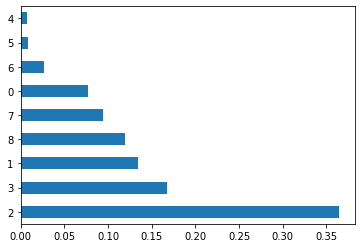

In [0]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(dataframeX,dataframeY)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=dataframeX.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

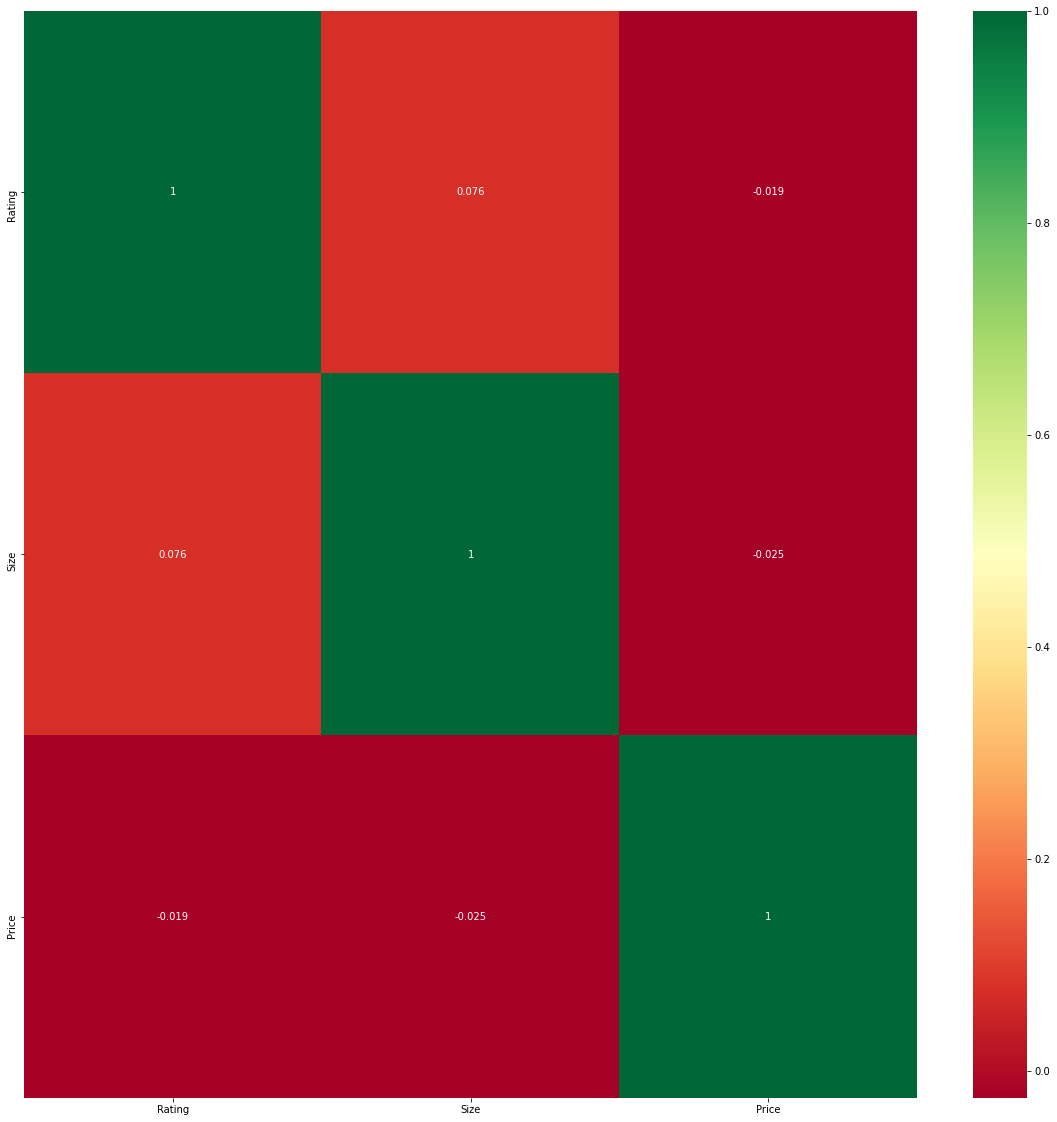

In [0]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")